In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import pandas as pd
from scipy.sparse.linalg import eigs
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding, TSNE, MDS
from sklearn.decomposition import PCA
from time import time
from matplotlib.ticker import NullFormatter
import scipy.io as scio

## Dataset 1 : (Chinese Mainland)

### import data and pre-process

In [2]:
import scipy.io as scio

data_cn = scio.loadmat('./univ_cn.mat')
data_cn.keys()

dict_keys(['__header__', '__version__', '__globals__', 'univ_cn', 'W_cn', 'rank_cn'])

In [3]:
univ_url_cn = data_cn['univ_cn'][0]
rank_cn, w_cn = np.array(data_cn['rank_cn']), np.array(data_cn['W_cn'])

n = rank_cn.shape[0]
research_rank = data_cn['rank_cn'].reshape((n,))
research_idx = np.arange(n,)
print('Number of cn universities:', n)

print('- a given rank cn:\n',rank_cn[:10].reshape(1,10))
print('- univ url cn:\n',univ_url_cn[:10])
print('- w_cn:\n',w_cn[:10,:10])

Number of cn universities: 76
- a given rank cn:
 [[1 1 3 4 5 6 7 8 8 8]]
- univ url cn:
 [array(['pku.edu.cn'], dtype='<U10')
 array(['tsinghua.edu.cn'], dtype='<U15')
 array(['fudan.edu.cn'], dtype='<U12') array(['nju.edu.cn'], dtype='<U10')
 array(['zju.edu.cn'], dtype='<U10') array(['ustc.edu.cn'], dtype='<U11')
 array(['sjtu.edu.cn'], dtype='<U11') array(['buaa.edu.cn'], dtype='<U11')
 array(['nankai.edu.cn'], dtype='<U13')
 array(['tju.edu.cn'], dtype='<U10')]
- w_cn:
 [[  0 159  34  38  27  18  33  15  18  17]
 [ 53   0  12  12  14   5  20   8   8  11]
 [ 18  17   0   8   3   7  13   4   3   5]
 [ 18  19   7   0   5   9   7   3   4   3]
 [123  49  16   7   0   3  15   4   5   5]
 [ 48 124  17  21  13   0  23   9  11  13]
 [ 24  96  17  18  16  15   0   6   9  14]
 [  1   0   0   0   0   0   0   0   0   0]
 [  6   8   5   3   1   0   3   0   0   2]
 [ 29  40  12  13   9  11  13   6  12   0]]


In [4]:
print('format: ',univ_url_cn[0], ';', univ_url_cn[0][0], ';', univ_url_cn[0][0][0])

univ_cn = [univ_url_cn[i][0].split('.')[0] for i in range(n)]
print()
print(univ_cn[:10])

format:  ['pku.edu.cn'] ; pku.edu.cn ; p

['pku', 'tsinghua', 'fudan', 'nju', 'zju', 'ustc', 'sjtu', 'buaa', 'nankai', 'tju']


In [5]:
'''
Variables:
rank_cn, w_cn, univ_cn

'''

'\nVariables:\nrank_cn, w_cn, univ_cn\n\n'

### Pagerank Algorithm

In [6]:
def UnivPageRank(alpha, w):
    '''
    input: the Google’s hyperparameter alpha, the link matrix w,
    output: pagerank_score, university ranking according to pagerank
    '''
    # compute the out-degree vector (number of out-links from each university)
    d0 = np.sum(w, axis = 1)
    
    # compute the markov matrix
    n = w.shape[0]
    indices = [i for i in range(n) if d0[i]>0]
    P1 = np.zeros((n,n))
    for i in indices:
        P1[i,:] = w[i,:] / d0[i]
    
    #pagerank
    P = P1 * alpha + (1 - alpha) * np.ones((n,n)) / n
    #compute the latgest eigenvalue of P' and its corresponding eigenvector
    leval, levec = eigs(P.T,1)
    levec = levec.reshape((n,))
    
    pagerank_score = np.abs(levec/np.sum(levec))
    
    #indeices of the scores in descending order
    pagerank_idx = np.argsort(-pagerank_score)
    
    #university ranking according to pagerank
    univ_pagerank = [univ_cn[i] for i in pagerank_idx]
    
    return pagerank_score, pagerank_idx, univ_pagerank

rank: 
 ['tsinghua', 'pku', 'sjtu', 'nju', 'uestc', 'scut', 'zsu', 'dlut', 'fudan', 'seu', 'zju', 'ustc', 'hust', 'gzsums', 'jnu', 'whu', 'bnu', 'tju', 'lzu', 'ecnu', 'tongji', 'swjtu', 'xmu', 'nankai', 'jlu', 'bupt', 'ruc', 'bfsu', 'njau', 'sdu', 'fzu', 'nuaa', 'hit', 'cau', 'cumt', 'njtu', 'swufe', 'xidian', 'bit', 'neu', 'njust', 'buaa', 'cqu', 'ecust', 'nwu', 'nwpu', 'shufe', 'cug', 'nenu', 'tyut', 'ccnu', 'njmu', 'xju', 'scau', 'dlmu', 'ouqd', 'znufe', 'shsmu', 'shisu', 'ustb', 'sicau', 'hfut', 'njim', 'ccom', 'cupl', 'scu', 'uibe', 'henu', 'cpums', 'usst', 'hzau', 'csu', 'cdut', 'cun', 'sdust', 'nip']


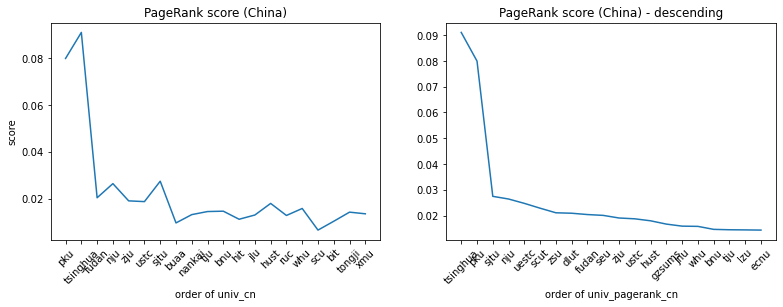

In [7]:
pagerank_score_cn, pagerank_idx_cn, univ_pagerank_cn = UnivPageRank(0.85,w_cn)
print('rank: \n',univ_pagerank_cn)

plt.figure(figsize=(13,4))
plt.subplot(121)
plt.title('PageRank score (China)')
plt.xlabel('order of univ_cn')
plt.plot(pagerank_score_cn[:20])
plt.xticks(range(20), univ_cn[:20], rotation=45)
plt.ylabel('score')


plt.subplot(122)
plt.title('PageRank score (China) - descending')
plt.xlabel('order of univ_pagerank_cn')
pr_score_descend = pagerank_score_cn[pagerank_idx_cn]
plt.plot(pr_score_descend[:20])
plt.xticks(range(20), univ_pagerank_cn[:20], rotation=45);


In [8]:
import networkx as nx
import random

In [9]:
ws_graph = nx.from_numpy_matrix(w_cn, create_using=nx.MultiDiGraph())

# alpha = 0.85
pr = nx.pagerank(ws_graph, alpha=0.85)
print(pr[0], '\n', pr.keys())


0.07811138411268902 
 dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75])


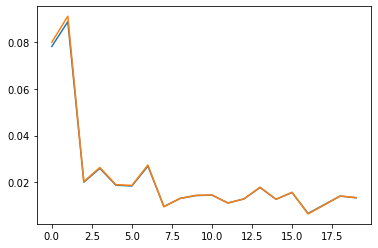

In [10]:
# convert dict to array, remaining scores under the order in w_cn(ws_graph)
pr = np.array([pr[i] for i in pr.keys()])

#indeices of the scores in descending order
pr_idx = np.argsort(-pr)
#university ranking according to pagerank
univ_pr = [univ_cn[i] for i in pr_idx]

# compare two implementations of pagerank
plt.figure()
plt.plot(pr[:20])
plt.plot(pagerank_score_cn[:20])


### Compare a range of $\alpha$

xlabel: order of univ_cn


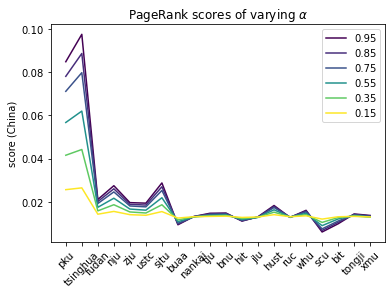

In [11]:
# alphaset = np.array([0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])
alphaset = np.array([0.95, 0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25, 0.15])
alphaset_plot = np.array([0.95, 0.85, 0.75, 0.55, 0.35, 0.15])


def pr_alpha_plot(alphaset, alphaset_plot, n, ws_graph, univ_name, choosecolor='viridis'):
    n_alpha = alphaset.shape[0]
    # n:=n_univ, a: alpha
    pr_a, pr_idx_a = np.zeros([n_alpha, n]), np.zeros([n_alpha, n])
    # a list(store strings) with assigned number of columns
    univ_pr_a = [ [] for _ in range(n_alpha) ]  


    plt.figure()
    plt.title(r'PageRank scores of varying $\alpha$')
#     plt.xlabel('order of '+ varname(univ_name))
    print('xlabel: order of univ_cn')
    plt.xticks(range(20), univ_name[:20], rotation=45)
    plt.ylabel('score (China)')
    # colors = plt.get_cmap('Spectral')(np.linspace(0,1,n_alpha))
    colors = plt.get_cmap('plasma')(np.linspace(0,1,n_alpha))
    colors = plt.get_cmap('viridis')(np.linspace(0,1,n_alpha))
    colors = plt.get_cmap(choosecolor)(np.linspace(0,1,n_alpha))

    for i_a, alpha in enumerate(alphaset):
        pr_dict = nx.pagerank(ws_graph, alpha=alphaset[i_a])
        # convert dict to array
        pr = np.array([pr_dict[i] for i in pr_dict.keys()])
        pr_a[i_a] = pr

        idx = np.argsort(-pr)
        pr_idx_a[i_a] = idx

        
        univ_pr_a[i_a] = [univ_name[i] for i in idx]
#         print(univ_pr_a[i_a])
#         print()
    
        '''if alpha is in alphaset_plot, then plot'''
        if (alpha==alphaset_plot).sum():
        #     plt.plot(pr_a[i_a][:20], color=colors[-i_a-1], label=alphaset[i_a]);
            plt.plot(pr_a[i_a][:20], color=colors[i_a], label=alphaset[i_a]);
        plt.legend()
    
    return n_alpha, pr_a, pr_idx_a, univ_pr_a

      
# run function
n_alpha, pr_a, pr_idx_a, univ_pr_a = pr_alpha_plot(alphaset, alphaset_plot, n, ws_graph, univ_cn, choosecolor='viridis')

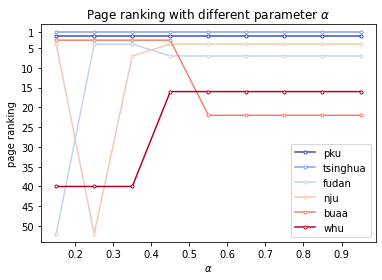

In [12]:
pageranks_idx = pr_idx_a.T

colors = plt.get_cmap('coolwarm')(np.linspace(0,1,6))
plot_idx = [0,1,2,3,7,15]

for i in range(6):
    plt.plot(alphaset, pageranks_idx[plot_idx[i],:]+1, color=colors[i], 
             marker='.', mec=colors[i], mfc='w', label=univ_cn[plot_idx[i]])

plt.legend() 
# ax.invert_yaxis()
plt.ylim(54,-1)
plt.yticks(np.append(np.ones(1),np.arange(5,51,5).astype(int)))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'page ranking')
plt.title(r"Page ranking with different parameter $\alpha$")
plt.show()

### HITS authority/ hub ranking

top: order of univ_cn
bottom: order of univ_pagerank_cn


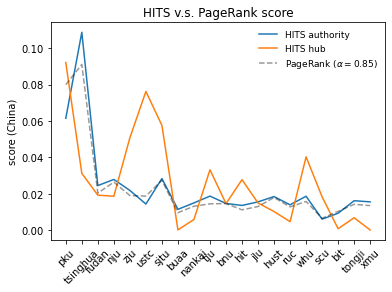

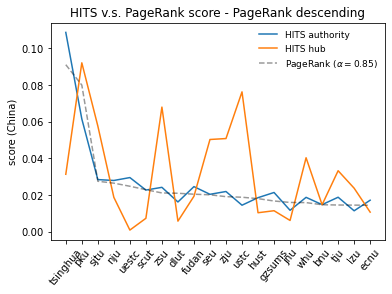

In [13]:
u,s,v = np.linalg.svd(w_cn)

# auth: right primary v[0]
auth_score = v[0] / np.sum(v[0]) 
auth_idx = np.argsort(-auth_score) 
univ_authrank = [univ_cn[i] for i in auth_idx] 
# print(univ_authrank)


# hub: left primary u[:,0]
hub_score = u[:,0] / np.sum(u[:,0]) 
hub_idx = np.argsort(-hub_score) 
univ_hubrank = [univ_cn[i] for i in hub_idx] 
# print(univ_hubrank)

'''plot'''
plt.figure(figsize=(6,4))

# plt.subplot(121)

plt.title('HITS v.s. PageRank score')
print('top: order of univ_cn')
plt.xticks(range(20), univ_cn[:20], rotation=45)

plt.plot(auth_score[:20], label='HITS authority')
plt.plot(hub_score[:20], label='HITS hub')
plt.plot(pagerank_score_cn[:20],'k--',alpha=0.4, label=r'PageRank ($\alpha=0.85$)')
plt.ylabel('score (China)')
plt.legend(fontsize=9, frameon=False)


# plt.subplot(122)
plt.figure(figsize=(6,4))

plt.title('HITS v.s. PageRank score - PageRank descending')
print('bottom: order of univ_pagerank_cn')
plt.xticks(range(20), univ_pagerank_cn[:20], rotation=50)

plt.plot(auth_score[pagerank_idx_cn][:20], label='HITS authority')
plt.plot(hub_score[pagerank_idx_cn][:20], label='HITS hub')
pr_score_descend = pagerank_score_cn[pagerank_idx_cn]
plt.plot(pr_score_descend[:20],'k--',alpha=0.4, label=r'PageRank ($\alpha=0.85$)')

plt.ylabel('score (China)')
plt.legend(fontsize=9, frameon=False)


plt.show()

In [14]:
print('Research rank:', univ_cn[:10])
i_85 = 1
print('pr:', univ_pr_a[i_85][:10])
print('auth:', univ_authrank[:10])
print('hub:', univ_hubrank[:10])

Research rank: ['pku', 'tsinghua', 'fudan', 'nju', 'zju', 'ustc', 'sjtu', 'buaa', 'nankai', 'tju']
pr: ['tsinghua', 'pku', 'sjtu', 'nju', 'uestc', 'scut', 'zsu', 'dlut', 'fudan', 'seu']
auth: ['tsinghua', 'pku', 'uestc', 'sjtu', 'nju', 'fudan', 'zsu', 'scut', 'zju', 'gzsums']
hub: ['pku', 'ustc', 'zsu', 'sjtu', 'zju', 'seu', 'njau', 'whu', 'tju', 'tsinghua']


### Compare these rankings against the research ranking

In [15]:
Y = data_cn['univ_cn']
univ = [Y[0][i][0].split('.')[0] for i in range(n)]
w = data_cn['W_cn']
pagerank_score, pagerank_idx, univ_pagerank = UnivPageRank(0.85,w)
u,s,vh = np.linalg.svd(w)
authority_score = vh[0,:] / np.sum(vh[0,:])
authority_idx = np.argsort(-authority_score)
univ_authrank = [univ[i] for i in authority_idx]
hub_score = u[:,0] / np.sum(u[:,0])
hub_idx = np.argsort(-hub_score)
univ_hubrank = [univ[i] for i in hub_idx]

In [16]:
from scipy import stats
stats.spearmanr(research_idx,pagerank_idx)

SignificanceResult(statistic=0.7055639097744362, pvalue=1.1053900271970499e-12)

In [17]:
stats.spearmanr(research_idx,authority_idx)

SignificanceResult(statistic=0.7505126452494874, pvalue=5.944060997007626e-15)

In [18]:
stats.spearmanr(research_idx,hub_idx)

SignificanceResult(statistic=0.5395762132604237, pvalue=4.914937264782889e-07)

In [19]:
stats.kendalltau(research_idx,pagerank_idx)

SignificanceResult(statistic=0.5200000000000001, pvalue=3.000136824018435e-11)

In [20]:
stats.kendalltau(research_idx,authority_idx)

SignificanceResult(statistic=0.5719298245614035, pvalue=2.664997636484326e-13)

In [21]:
stats.kendalltau(research_idx,hub_idx)

SignificanceResult(statistic=0.3782456140350878, pvalue=1.3335979791583232e-06)

In [22]:
data=np.zeros([3,n])
for i in research_idx:
    data[0][i]=np.where(pagerank_idx==i)[0]
    data[1][i]=np.where(authority_idx==i)[0]
    data[2][i]=np.where(hub_idx==i)[0]
stats.page_trend_test(data, ranked=False)

PageTrendTestResult(statistic=410944.0, pvalue=9.487895623204534e-24, method='asymptotic')

## Dataset 2 : United Kindom University

In [23]:
with open('univ_uk.txt', 'r') as f:
    lines = f.readlines()
    str_list = [lines[i].strip().split()[0][4:-11] for i in range(len(lines))]
univ_uk_all = str_list
n_uk_all = len(univ_uk_all)
print(n_uk_all,'universities:(Show 10 for example)\n ',univ_uk_all[:10])

112 universities:(Show 10 for example)
  ['abdn', 'aber', 'anglia', 'arts', 'aston', 'bangor', 'bath', 'bathspa', 'bbk', 'bham']


In [24]:
# Shanghai rank (published on the internet)
rankSH = pd.read_csv('UK_ranks_SH.csv')
rankSH.head()

Rank  index of univ                 University
0     1             17    University of Cambridge
1     2             72       University of Oxford
2     3             43    Imperial College London
3     4             99  University College London
4     5             61   University of Manchester

In [25]:
col1, col2, col3 = rankSH['Rank'], rankSH['index of univ'], rankSH['University']

'''
remove the unknown item marked with '?', then obtain the index in the above univ names

- As captured from the internet, U's of col2 indice correspond to the ranking 1,2,3,....
Variable: univ_uk(below) is ranked by this order.
'''

# rankSH_idx = np.array([int(col2[i]) for i in range(len(col2)) if col2[i]!='?'])
rankSH_idx = [int(col2[i]) for i in range(len(col2)) if col2[i]!='?']

univ_uk = [univ_uk_all[i] for i in rankSH_idx ]
n_uk = len(univ_uk)

print(n,'UK universities to be ranked.\n')
print('Top-10 ranking from the Internet: \n', univ_uk[:10])

76 UK universities to be ranked.

Top-10 ranking from the Internet: 
 ['cam', 'ox', 'ic', 'ucl', 'manchester', 'ed', 'bris', 'shef', 'nottingham', 'kcl']


In [26]:
# link matrix
array = np.loadtxt('W_uk_final.csv', delimiter=',')
print('Original Link matrix:', array.shape)

# Retain the 42 U's
w_uk = array[rankSH_idx, :][:,rankSH_idx]
print('Link matrix:', w_uk.shape)

print(w_uk)

Original Link matrix: (112, 112)
Link matrix: (42, 42)
[[   0. 1724.  636. ...  120.   80.   79.]
 [1515.    0.  320. ...   83.   26.   60.]
 [ 552.  275.    0. ...   78.    4.   10.]
 ...
 [ 108.   65.   74. ...    0.    5.   22.]
 [  31.   24.   11. ...    9.    0.    9.]
 [ 186.  191.   43. ...   26.   35.    0.]]


In [27]:
'''
Variables:
w_uk, univ_uk
n_uk
'''

'\nVariables:\nw_uk, univ_uk\nn_uk\n'

### Compare a range of $\alpha$

xlabel: order of univ_uk


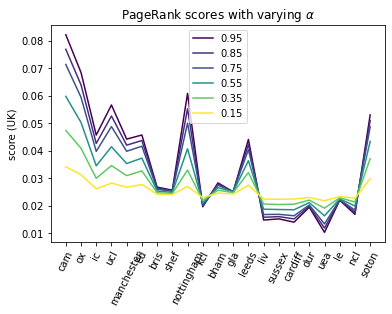

In [28]:
import networkx as nx
import random

ws_graph2 = nx.from_numpy_matrix(w_uk, create_using=nx.MultiDiGraph())

# alphaset = np.array([0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])
alphaset = np.array([0.95, 0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25, 0.15])
alphaset_plot = np.array([0.95, 0.85, 0.75, 0.55, 0.35, 0.15])


def pr_alpha_plot(alphaset, alphaset_plot, n, ws_graph, univ_name, choosecolor='viridis'):
    n_alpha = alphaset.shape[0]
    # n:=n_univ, a: alpha
    pr_a, pr_idx_a = np.zeros([n_alpha, n]), np.zeros([n_alpha, n])
    # a list(store strings) with assigned number of columns
    univ_pr_a = [ [] for _ in range(n_alpha) ]  


    plt.figure()
    plt.title(r'PageRank scores with varying $\alpha$')
#     plt.xlabel('order of '+ varname(univ_name))
    print('xlabel: order of univ_uk')
    n_top = 21
    plt.xticks(range(n_top), univ_name[:n_top], rotation=63)
    plt.ylabel('score (UK)')
    # colors = plt.get_cmap('Spectral')(np.linspace(0,1,n_alpha))
#     colors = plt.get_cmap('plasma')(np.linspace(0,1,n_alpha))
#     colors = plt.get_cmap('viridis')(np.linspace(0,1,n_alpha))
    colors = plt.get_cmap(choosecolor)(np.linspace(0,1,n_alpha))

    for i_a, alpha in enumerate(alphaset):
        pr_dict = nx.pagerank(ws_graph, alpha=alphaset[i_a])
        # convert dict to array
        pr = np.array([pr_dict[i] for i in pr_dict.keys()])
        pr_a[i_a] = pr

        idx = np.argsort(-pr)
        pr_idx_a[i_a] = idx
        
        univ_pr_a[i_a] = [univ_name[i] for i in idx]
#         print(univ_pr_a[i_a])
#         print()
    
        '''if alpha is in alphaset_plot, then plot'''
        if (alpha==alphaset_plot).sum():
        #     plt.plot(pr_a[i_a][:n_top], color=colors[-i_a-1], label=alphaset[i_a]);
            plt.plot(pr_a[i_a][:n_top], color=colors[i_a], label=alphaset[i_a]);
        plt.legend()
    
    return n_alpha, pr_a, pr_idx_a, univ_pr_a
    
# run function
n_alpha, pr_a2, pr_idx_a2, univ_pr_a2 = pr_alpha_plot(alphaset, alphaset_plot, n_uk, ws_graph2, univ_uk, choosecolor='viridis')

In [29]:
a = np.array([5,6,4,3,2,1])
idx = np.argsort(-a)
c = []
b = [univ_uk[i] for i in idx]
print(idx)
print(univ_uk[0:25])
print(b)

[1 0 2 3 4 5]
['cam', 'ox', 'ic', 'ucl', 'manchester', 'ed', 'bris', 'shef', 'nottingham', 'kcl', 'bham', 'gla', 'leeds', 'liv', 'sussex', 'cardiff', 'dur', 'uea', 'le', 'ncl', 'soton', 'st-andrews', 'lse', 'qmul', 'qub']
['ox', 'cam', 'ic', 'ucl', 'manchester', 'ed']


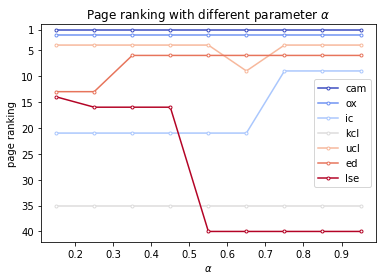

In [30]:
'''
plot
'''
pageranks_idx2 = pr_idx_a2.T

# plot_idx = [0,1,2,3,4,5]
# [cam,ox,icl,ucl,kcl,lse]: [0,1,2,3,9,22]
# kcl->leeds
plot_idx = [0,1,2,9,3,5,22]
colors = plt.get_cmap('coolwarm')(np.linspace(0,1,len(plot_idx))) 


plt.figure()
# select some indice of univ 
# (each row = a univ, in the order of univ_uk)
for i in range(len(plot_idx)):
    plt.plot(alphaset, pageranks_idx2[plot_idx[i],:]+1, color=colors[i], 
             marker='.', mec=colors[i], mfc='w', label=univ_uk[plot_idx[i]])

plt.legend(loc='center right')

plt.ylim(42,0)
plt.yticks(np.append(np.ones(1),np.arange(5,45,5).astype(int)))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'page ranking')
plt.title(r'Page ranking with different parameter $\alpha$')
plt.show()

### HITS authority/ hub ranking
(right/ left singular vector)

In [31]:
u2,s2,v2 = np.linalg.svd(w_uk)

# auth: right primary v[0]
auth_score2 = v2[0] / np.sum(v2[0]) 
auth_idx2 = np.argsort(-auth_score2) 
univ_authrank2 = [univ_uk[i] for i in auth_idx2] 
print(auth_score2[:10])
print(univ_authrank2[:10])


# hub: left primary u[:,0]
hub_score2 = u2[:,0] / np.sum(u2[:,0]) 
hub_idx2 = np.argsort(-hub_score2) 
univ_hubrank2 = [univ_uk[i] for i in hub_idx2] 
print(univ_hubrank2[:10])

[0.86761314 0.00834841 0.00680111 0.00904258 0.0054367  0.00787245
 0.00288432 0.00359324 0.00843493 0.00294367]
['cam', 'ucl', 'nottingham', 'ox', 'ed', 'ic', 'leeds', 'ex', 'manchester', 'soton']
['dundee', 'ox', 'ucl', 'bris', 'ed', 'manchester', 'leeds', 'ncl', 'ic', 'le']


order of univ_uk (SHrank)
order of univ_pagerank_uk


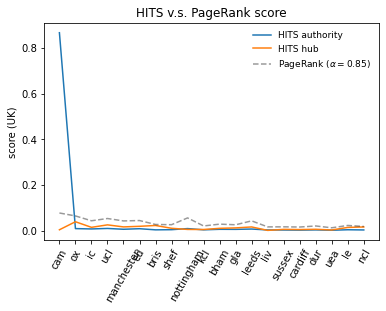

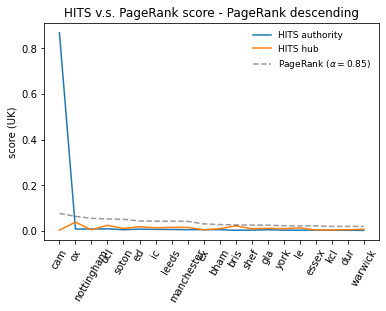

In [32]:
'''plot
(pr_a2, pr_idx_a2, univ_pr_a2)  
'''
# when alpha=0.85 in pagerank:
i_85 = 1
pagerank_score_uk = pr_a2[i_85]
pagerank_idx_uk = pr_idx_a2[i_85].astype(int)
univ_pagerank_uk = univ_pr_a2[i_85]


plt.figure(figsize=(6,4))

# plt.subplot(121)

plt.title('HITS v.s. PageRank score')
print('order of univ_uk (SHrank)')
n_top = 20
plt.xticks(range(n_top), univ_uk[:n_top], rotation=60)

plt.plot(auth_score2[:n_top], label='HITS authority')
plt.plot(hub_score2[:n_top], label='HITS hub')
plt.plot(pagerank_score_uk[:n_top],'k--',alpha=0.4, label=r'PageRank ($\alpha=0.85$)')
plt.ylabel('score (UK)')
plt.legend(fontsize=9, frameon=False)


# plt.subplot(122)
plt.figure(figsize=(6,4))

plt.title('HITS v.s. PageRank score - PageRank descending')
print('order of univ_pagerank_uk')
plt.xticks(range(n_top), univ_pagerank_uk[:n_top], rotation=60)

plt.plot(auth_score2[pagerank_idx_uk][:n_top], label='HITS authority')
plt.plot(hub_score2[pagerank_idx_uk][:n_top], label='HITS hub')

pr_score_descend = pagerank_score_uk[pagerank_idx_uk]
plt.plot(pr_score_descend[:n_top],'k--',alpha=0.4, label=r'PageRank ($\alpha=0.85$)')

plt.ylabel('score (UK)')
plt.legend(fontsize=9, frameon=False)

plt.show()

In [33]:
print('SH rank:', univ_uk[:10])
print('pr:', univ_pr_a2[i_85][:10])
print('auth:', univ_authrank2[:10])
print('hub:', univ_hubrank2[:10])

SH rank: ['cam', 'ox', 'ic', 'ucl', 'manchester', 'ed', 'bris', 'shef', 'nottingham', 'kcl']
pr: ['cam', 'ox', 'nottingham', 'ucl', 'soton', 'ed', 'ic', 'leeds', 'manchester', 'ex']
auth: ['cam', 'ucl', 'nottingham', 'ox', 'ed', 'ic', 'leeds', 'ex', 'manchester', 'soton']
hub: ['dundee', 'ox', 'ucl', 'bris', 'ed', 'manchester', 'leeds', 'ncl', 'ic', 'le']


### Compare these rankings against the research ranking

In [34]:
with open('univ_uk.txt', 'r') as f:
    lines = f.readlines()
    str_list = [lines[i].strip().split()[0][4:-11] for i in range(len(lines))]
univ = str_list

In [35]:
def UnivPageRank(alpha, w):
    '''
    input: the Google’s hyperparameter alpha, the link matrix w,
    output: pagerank_score, university ranking according to pagerank
    '''
    # compute the out-degree vector (number of out-links from each university)
    d0 = np.sum(w, axis = 1)
    
    # compute the markov matrix
    n = w.shape[0]
    indices = [i for i in range(n) if d0[i]>0]
    P1 = np.zeros((n,n))
    for i in indices:
        P1[i,:] = w[i,:] / d0[i]
    
    #pagerank
    P = P1 * alpha + (1 - alpha) * np.ones((n,n)) / n
    #compute the latgest eigenvalue of P' and its corresponding eigenvector
    leval, levec = eigs(P.T,1)
    levec = levec.reshape((n,))
    
    pagerank_score = np.abs(levec/np.sum(levec))
    
    #indeices of the scores in descending order
    pagerank_idx = np.argsort(-pagerank_score)
    
    #university ranking according to pagerank
    univ_pagerank = [univ[i] for i in pagerank_idx]
    
    return pagerank_score, pagerank_idx, univ_pagerank

In [36]:
w = np.loadtxt('W_uk_final.csv', delimiter=',')
pagerank_score, pagerank_idx, univ_pagerank = UnivPageRank(0.85,w)
u,s,vh = np.linalg.svd(w)
authority_score = vh[0,:] / np.sum(vh[0,:])
authority_idx = np.argsort(-authority_score)
univ_authrank = [univ[i] for i in authority_idx]
hub_score = u[:,0] / np.sum(u[:,0])
hub_idx = np.argsort(-hub_score)
univ_hubrank = [univ[i] for i in hub_idx]

In [37]:
with open('UK_ranks_SH.csv', 'r') as f:
    lines = f.readlines()
    str_list = [lines[i].strip().split()[0] for i in range(len(lines))]
    index = [int(str_list[i].split(',')[1]) for i in range(1,len(str_list))]
print(index)

[17, 72, 43, 99, 61, 27, 12, 83, 69, 44, 9, 31, 52, 54, 93, 19, 26, 102, 51, 65, 86, 87, 59, 77, 78, 0, 6, 25, 49, 79, 107, 111, 71, 28, 29, 81, 14, 50, 11, 92, 5, 94]


In [38]:
# Ranking Transformation for Top42 Universities
research_idx = index
pagerank_idx_top = [i for i in pagerank_idx if i in index]
authority_idx_top = [i for i in authority_idx if i in index]
hub_idx_top = [i for i in hub_idx if i in index]
print(pagerank_idx_top)

[17, 72, 27, 99, 86, 69, 52, 61, 43, 29, 31, 9, 12, 51, 83, 111, 28, 107, 65, 44, 26, 49, 92, 71, 93, 54, 19, 6, 79, 77, 50, 59, 0, 102, 81, 78, 25, 14, 94, 5, 11, 87]


In [39]:
from scipy import stats
stats.spearmanr(research_idx,pagerank_idx_top)

SignificanceResult(statistic=0.260189611862896, pvalue=0.09608557190512187)

In [40]:
stats.spearmanr(research_idx,authority_idx_top)

SignificanceResult(statistic=0.2644032088161413, pvalue=0.0906311040798686)

In [41]:
stats.spearmanr(research_idx,hub_idx_top)

SignificanceResult(statistic=0.10542095454177135, pvalue=0.5064068418821586)

In [42]:
stats.kendalltau(research_idx,pagerank_idx_top)

SignificanceResult(statistic=0.1800232288037166, pvalue=0.09299714086329888)

In [43]:
stats.kendalltau(research_idx,authority_idx_top)

SignificanceResult(statistic=0.18466898954703834, pvalue=0.08486232422393629)

In [44]:
stats.kendalltau(research_idx,hub_idx_top)

SignificanceResult(statistic=0.08478513356562137, pvalue=0.42886847205388146)

In [45]:
data=np.zeros([3,42])
j=0
for i in research_idx:
    data[0][j]=pagerank_idx_top.index(i)
    data[1][j]=authority_idx_top.index(i)
    data[2][j]=hub_idx_top.index(i)
    j+=1
stats.page_trend_test(data, ranked=False)

PageTrendTestResult(statistic=70317.0, pvalue=2.354770209859256e-13, method='asymptotic')

### Visualization of Pagerank

In [46]:
# Create DiGraph from A
ws_graph = nx.from_numpy_matrix(array, create_using=nx.MultiDiGraph())
# 根据节点的PageRank值给节点上色
pr = nx.pagerank(ws_graph, alpha=0.85)
node_color = [pr[node] for node in ws_graph.nodes()]
# 根据节点的PageRank值调整大小
node_size = 100000*np.array(node_color)
node_size.shape

(112,)

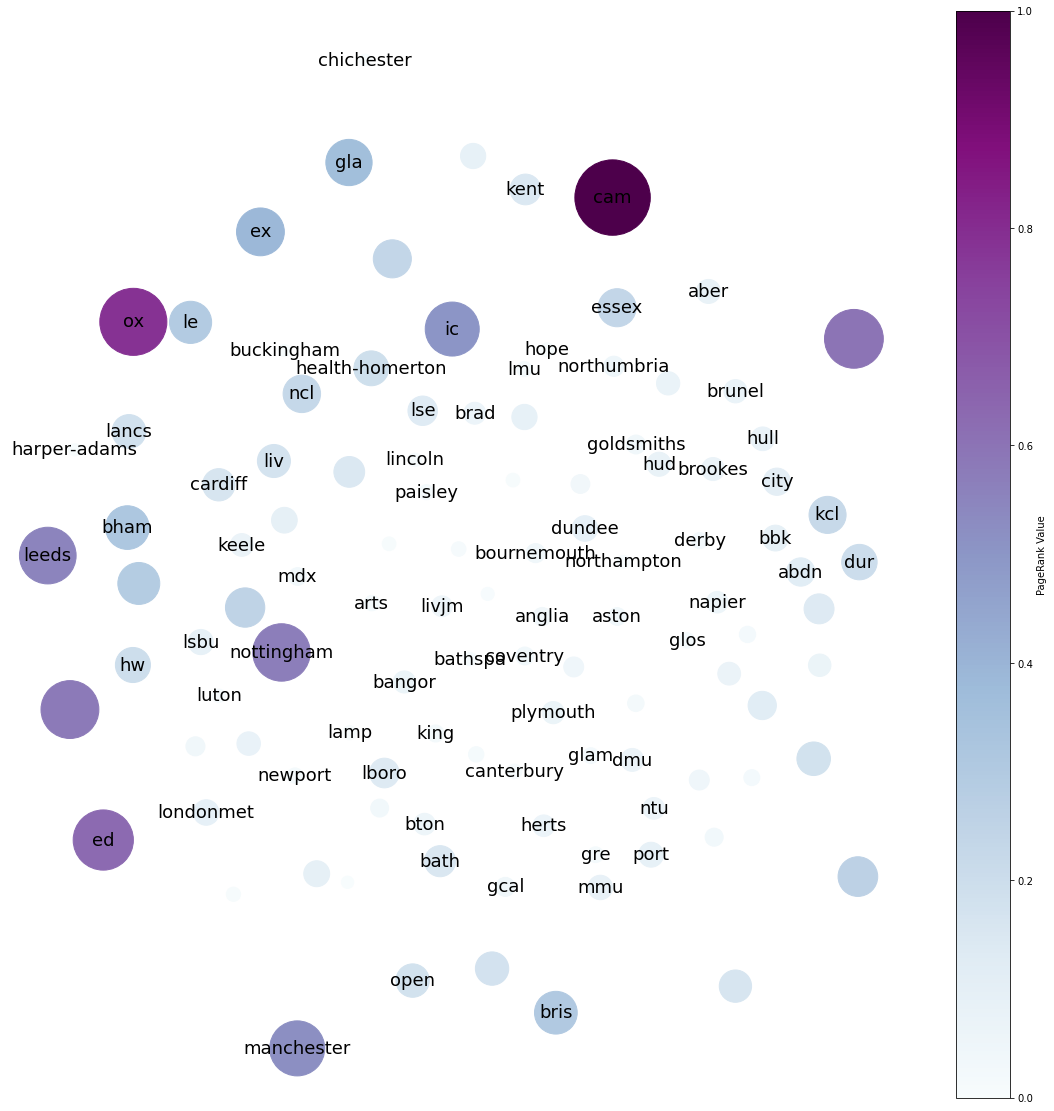

In [47]:
plt.figure(figsize=(20,20))
pr = nx.pagerank(ws_graph, alpha=0.85)
pos = nx.kamada_kawai_layout(ws_graph)
# pos = nx.random_layout(ws_graph, seed=5)
labeldict = {i : univ[i] for i in range(n)}
cbar = plt.colorbar(plt.scatter([], [], c=[], cmap = mpl.colormaps['BuPu']))
cbar.ax.set_ylabel('PageRank Value')
nx.draw_networkx_nodes(ws_graph, pos, node_size=node_size, cmap = mpl.colormaps['BuPu'], node_color=node_color,  label = labeldict)
nx.draw_networkx_labels(ws_graph, pos, labels = labeldict, font_size=18)
plt.axis('off')
plt.savefig('figure1.png')
plt.show()